# Scapy + Pandas + Tshark

## Analyzing pcap with pandas

First we have to export our `.pcap` file to a `.csv` file using **Wireshark** (or [tshark](https://osqa-ask.wireshark.org/questions/10173/covert-the-pcap-file-to-a-csv-file-using-tshark)).

In [1]:
import pandas as pd
import matplotlib as plt
%matplotlib inline

df = pd.read_csv("../data/attacker.csv")
df.head(5)

,No.,Time,Source,Src Port,Destination,Dst Port,Protocol,Length,Packet Length,Relative Time,Date,Channel,Info
0,1,0.000000,247.193.164.155,53,227.213.154.241,9231,DNS,103,103,0.000000,"2013-08-15 00:56:40,211654",NaN,Standard query response 0x67c5 A ddostheinter....
1,2,0.000528,247.193.164.155,53,227.213.154.241,64042,DNS,103,103,0.000528,"2013-08-15 00:56:40,212182",NaN,Standard query response 0x91ef A ddostheinter....
2,3,0.000833,247.193.164.155,53,227.213.154.241,18784,DNS,103,103,0.000833,"2013-08-15 00:56:40,212487",NaN,Standard query response 0x9462 A ddostheinter....
3,4,0.002216,249.229.186.21,53,227.213.154.241,43998,DNS,103,103,0.002216,"2013-08-15 00:56:40,213870",NaN,Standard query response 0x67c5 A ddostheinter....
4,5,0.002298,127.227.189.185,53,227.213.154.241,8790,DNS,103,103,0.002298,"2013-08-15 00:56:40,213952",NaN,Standard query response 0x67c5 A ddostheinter....


In [2]:
df.dtypes

No.                int64
Time             float64
Source            object
Src Port           int64
Destination       object
Dst Port           int64
Protocol          object
Length             int64
Packet Length      int64
Relative Time    float64
Date              object
Channel          float64
Info              object
dtype: object

In [3]:
df.shape

(2167847, 13)

In [4]:
df_g = df.groupby("Protocol").Source.count()
df_g.sort_values()

Protocol
BAT_VIS           1
WTLS+WSP          1
MIPv6             1
KPASSWD           1
IPv6              1
DoIP              1
LWAPP             1
XYPLEX            1
CIP I/O           1
CLDAP             1
H.248             2
MobileIP          2
SRVLOC            2
NTP               3
QUAKE3            3
Chargen          22
TCP              25
TIME             31
ECHO             32
DAYTIME          32
XTACACS          38
NBNS            566
UDP            5063
ICMP         121592
DNS         2040424
Name: Source, dtype: int64

In [5]:
df[df["Protocol"] == "DNS"].head()

,No.,Time,Source,Src Port,Destination,Dst Port,Protocol,Length,Packet Length,Relative Time,Date,Channel,Info
0,1,0.000000,247.193.164.155,53,227.213.154.241,9231,DNS,103,103,0.000000,"2013-08-15 00:56:40,211654",NaN,Standard query response 0x67c5 A ddostheinter....
1,2,0.000528,247.193.164.155,53,227.213.154.241,64042,DNS,103,103,0.000528,"2013-08-15 00:56:40,212182",NaN,Standard query response 0x91ef A ddostheinter....
2,3,0.000833,247.193.164.155,53,227.213.154.241,18784,DNS,103,103,0.000833,"2013-08-15 00:56:40,212487",NaN,Standard query response 0x9462 A ddostheinter....
3,4,0.002216,249.229.186.21,53,227.213.154.241,43998,DNS,103,103,0.002216,"2013-08-15 00:56:40,213870",NaN,Standard query response 0x67c5 A ddostheinter....
4,5,0.002298,127.227.189.185,53,227.213.154.241,8790,DNS,103,103,0.002298,"2013-08-15 00:56:40,213952",NaN,Standard query response 0x67c5 A ddostheinter....


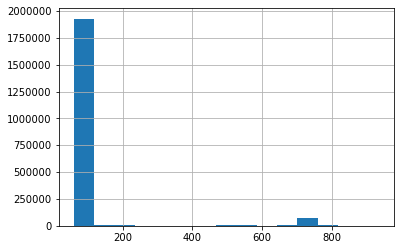

In [6]:
df[df["Protocol"] == "DNS"].Length.hist(bins=15)
# yaxis in bytes

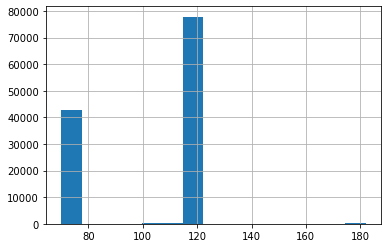

In [7]:
df[df["Protocol"] == "ICMP"].Length.hist(bins=15)

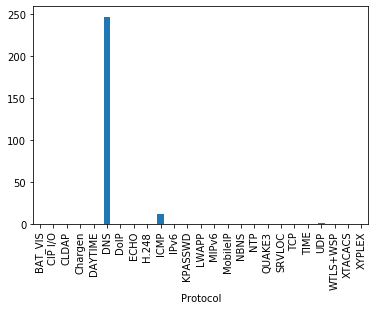

In [8]:
df_s = df.groupby("Protocol").Length.sum()
df_s_mb = df_s / (1024*1024) # convert to MB
df_s_mb.plot(kind="bar")

## Analyzing pcap with scapy

[scapy tutorial](https://vnetman.github.io/pcap/python/pyshark/scapy/libpcap/2018/10/25/analyzing-packet-captures-with-python-part-1.html)

[examples 1](https://medium.com/@vworri/extracting-the-payload-from-a-pcap-file-using-python-d938d7622d71)

[examples 2](https://medium.com/vera-worri/extracting-the-payload-from-tshark-directly-file-using-python-part-ii-994f587075c9)

In [9]:
#!pip install scapy

In [10]:
from scapy.all import *

pcap = rdpcap("data/attacker.pcap", count=100) # only 100 packets
for packet in pcap:
    print(packet.show, "\n")

<bound method Packet.show of <Ether  dst=44:d3:ca:5f:61:40 src=00:1b:c0:e6:93:3c type=IPv4 |<IP  version=4 ihl=5 tos=0x0 len=89 id=10443 flags= frag=0 ttl=124 proto=17 chksum=0xfaa4 src=247.193.164.155 dst=227.213.154.241 |<UDP  sport=53 dport=9231 len=69 chksum=0xff96 |<DNS  id=26565 qr=1 opcode=QUERY aa=0 tc=0 rd=1 ra=1 z=0 ad=0 cd=0 rcode=ok qdcount=1 ancount=1 nscount=0 arcount=1 qd=<DNSQR  qname='ddostheinter.net.' qtype=A qclass=IN |> an=<DNSRR  rrname='ddostheinter.net.' type=A rclass=IN ttl=390 rdlen=None rdata=62.116.143.18 |> ns=None ar=<DNSRROPT  rrname='.' type=OPT rclass=4000 extrcode=0 version=0 z=0 rdlen=None |> |>>>>> 

<bound method Packet.show of <Ether  dst=44:d3:ca:5f:61:40 src=00:1b:c0:e6:93:3c type=IPv4 |<IP  version=4 ihl=5 tos=0x0 len=89 id=10444 flags= frag=0 ttl=124 proto=17 chksum=0xfaa3 src=247.193.164.155 dst=227.213.154.241 |<UDP  sport=53 dport=64042 len=69 chksum=0xff50 |<DNS  id=37359 qr=1 opcode=QUERY aa=0 tc=0 rd=1 ra=1 z=0 ad=0 cd=0 rcode=ok qdcount=

In [11]:
# Differents keys of the pcap as json
pcap.summary()

Ether / IP / UDP / DNS Ans "62.116.143.18" 
Ether / IP / UDP / DNS Ans "62.116.143.18" 
Ether / IP / UDP / DNS Ans "62.116.143.18" 
Ether / IP / UDP / DNS Ans "62.116.143.18" 
Ether / IP / UDP / DNS Ans "62.116.143.18" 
Ether / IP / UDP / DNS Ans "62.116.143.18" 
Ether / IP / UDP / DNS Ans "62.116.143.18" 
Ether / IP / UDP / DNS Ans "62.116.143.18" 
Ether / IP / UDP / DNS Ans 
Ether / IP / UDP / DNS Ans 
Ether / IP / UDP / DNS Ans 
Ether / IP / UDP / DNS Ans "62.116.143.18" 
Ether / IP / UDP / DNS Ans 
Ether / IP / UDP / DNS Ans 
Ether / IP / UDP / DNS Ans "62.116.143.18" 
Ether / IP / UDP / DNS Ans "62.116.143.18" 
Ether / IP / UDP / DNS Ans "62.116.143.18" 
Ether / IP / UDP / DNS Ans "62.116.143.18" 
Ether / IP / UDP / DNS Ans "62.116.143.18" 
Ether / IP / UDP / DNS Ans 
Ether / IP / UDP / DNS Ans "62.116.143.18" 
Ether / IP / UDP / DNS Ans "62.116.143.18" 
Ether / IP / UDP / DNS Ans 
Ether / IP / UDP / DNS Ans "62.116.143.18" 
Ether / IP / UDP / DNS Ans "62.116.143.18" 
Ether / IP /

In [12]:
pcap[3][IP].show

<bound method Packet.show of <IP  version=4 ihl=5 tos=0x0 len=89 id=32050 flags= frag=0 ttl=119 proto=17 chksum=0x939f src=249.229.186.21 dst=227.213.154.241 |<UDP  sport=53 dport=43998 len=69 chksum=0x6027 |<DNS  id=26565 qr=1 opcode=QUERY aa=0 tc=0 rd=1 ra=1 z=0 ad=0 cd=0 rcode=ok qdcount=1 ancount=1 nscount=0 arcount=1 qd=<DNSQR  qname='ddostheinter.net.' qtype=A qclass=IN |> an=<DNSRR  rrname='ddostheinter.net.' type=A rclass=IN ttl=392 rdlen=None rdata=62.116.143.18 |> ns=None ar=<DNSRROPT  rrname='.' type=OPT rclass=4000 extrcode=0 version=0 z=0 rdlen=None |> |>>>>

In [13]:
pcap[3][IP]

<IP  version=4 ihl=5 tos=0x0 len=89 id=32050 flags= frag=0 ttl=119 proto=17 chksum=0x939f src=249.229.186.21 dst=227.213.154.241 |<UDP  sport=53 dport=43998 len=69 chksum=0x6027 |<DNS  id=26565 qr=1 opcode=QUERY aa=0 tc=0 rd=1 ra=1 z=0 ad=0 cd=0 rcode=ok qdcount=1 ancount=1 nscount=0 arcount=1 qd=<DNSQR  qname='ddostheinter.net.' qtype=A qclass=IN |> an=<DNSRR  rrname='ddostheinter.net.' type=A rclass=IN ttl=392 rdlen=None rdata=62.116.143.18 |> ns=None ar=<DNSRROPT  rrname='.' type=OPT rclass=4000 extrcode=0 version=0 z=0 rdlen=None |> |>>>

In [14]:
pcap[3][IP].src

'249.229.186.21'

In [15]:
pcap[3][UDP].show

<bound method Packet.show of <UDP  sport=53 dport=43998 len=69 chksum=0x6027 |<DNS  id=26565 qr=1 opcode=QUERY aa=0 tc=0 rd=1 ra=1 z=0 ad=0 cd=0 rcode=ok qdcount=1 ancount=1 nscount=0 arcount=1 qd=<DNSQR  qname='ddostheinter.net.' qtype=A qclass=IN |> an=<DNSRR  rrname='ddostheinter.net.' type=A rclass=IN ttl=392 rdlen=None rdata=62.116.143.18 |> ns=None ar=<DNSRROPT  rrname='.' type=OPT rclass=4000 extrcode=0 version=0 z=0 rdlen=None |> |>>>

In [16]:
count = 0
for (pkt_data, pkt_metadata,) in RawPcapReader("data/attacker.pcap"):
    count += 1
print(f"Pcap contains {count} packets")

Pcap contains 2167847 packets


In [17]:
import binascii # binary to ascii 

# Collect field names from IP/TCP/UDP (These will be columns in DF)
ip_fields = [field.name for field in IP().fields_desc]
tcp_fields = [field.name for field in TCP().fields_desc]
udp_fields = [field.name for field in UDP().fields_desc]

dataframe_fields = ip_fields + ["time"] + tcp_fields + ["payload", "payload_raw", "payload_hex"]

# Create blank DataFrame
df = pd.DataFrame(columns=dataframe_fields)
for packet in pcap[IP]:
    # Field array for each row of DataFrame
    field_values = []
    # Add all IP fields to dataframe
    for field in ip_fields:
        if field == "options":
            # Retrieving number of options defined in IP Header
            field_values.append(len(packet[IP].fields[field]))
        else:
            field_values.append(packet[IP].fields[field])
    
    field_values.append(packet.time)
    
    layer_type = type(packet[IP].payload)
    for field in tcp_fields:
        try:
            if field == "options":
                field_values.append(len(packet[layer_type].fields[field]))
            else:
                field_values.append(packet[layer_type].fields[field])
        except:
            field_values.append(None)
    
    # Append payload
    field_values.append(len(packet[layer_type].payload))
    field_values.append(packet[layer_type].payload.original)
    field_values.append(binascii.hexlify(packet[layer_type].payload.original))
    # Add row to DF
    df_append = pd.DataFrame([field_values], columns=dataframe_fields)
    df = pd.concat([df, df_append], axis=0)

# Reset Index
df = df.reset_index()
# Drop old index column
df = df.drop(columns="index")
df.columns

Index(['version', 'ihl', 'tos', 'len', 'id', 'flags', 'frag', 'ttl', 'proto',
       'chksum', 'src', 'dst', 'options', 'time', 'sport', 'dport', 'seq',
       'ack', 'dataofs', 'reserved', 'flags', 'window', 'chksum', 'urgptr',
       'options', 'payload', 'payload_raw', 'payload_hex'],
      dtype='object')

In [18]:
df[["src", "sport", "dst", "dport"]]

,src,sport,dst,dport
0,247.193.164.155,53,227.213.154.241,9231
1,247.193.164.155,53,227.213.154.241,64042
2,247.193.164.155,53,227.213.154.241,18784
3,249.229.186.21,53,227.213.154.241,43998
4,127.227.189.185,53,227.213.154.241,8790
...,...,...,...,...
95,111.111.231.123,53,227.213.154.241,4029
96,245.237.39.247,None,227.213.154.241,None
97,45.199.150.179,53,227.213.154.241,36238
98,223.239.184.59,53,227.213.154.241,42904


In [19]:
print("Top Source Address")
print(df["src"].describe(), "\n\n")

print("Top Destination Address")
print(df["dst"].describe(), "\n\n")

frequent_address = df["src"].describe()["top"]

print("Who is Top Address Speaking to?")
print(df[df["src"] == frequent_address]["dst"].unique(), "\n\n")

print("Who is the top address speaking to (Destination Ports)")
print(df[df["src"] == frequent_address]["dport"].unique(), "\n\n")

print("Who is the top address speaking to (Source Ports)")
print(df[df["src"] == frequent_address]["sport"].unique(), "\n\n")

print("Unique Source Addresses")
print(df["src"].unique())

print("Unique Destination Addresses")
print(df["dst"].unique())

Top Source Address
count               100
unique               51
top       109.211.6.209
freq                  3
Name: src, dtype: object 


Top Destination Address
count                 100
unique                  1
top       227.213.154.241
freq                  100
Name: dst, dtype: object 


Who is Top Address Speaking to?
['227.213.154.241'] 


Who is the top address speaking to (Destination Ports)
[40894 48910 16623] 


Who is the top address speaking to (Source Ports)
[53] 


Unique Source Addresses
['247.193.164.155' '249.229.186.21' '127.227.189.185' '45.103.41.119'
 '121.75.53.47' '113.125.43.159' '235.246.203.125' '127.227.23.113'
 '227.215.203.255' '123.71.173.119' '115.93.15.61' '177.123.93.47'
 '247.249.40.109' '111.95.125.125' '117.75.219.51' '113.83.187.51'
 '109.211.6.209' '247.71.185.119' '117.75.219.95' '57.65.233.177'
 '127.243.134.217' '111.125.235.113' '123.223.46.23' '235.80.251.221'
 '235.100.201.155' '127.221.222.175' '181.83.143.21' '111.205.170.115'
 '229.1

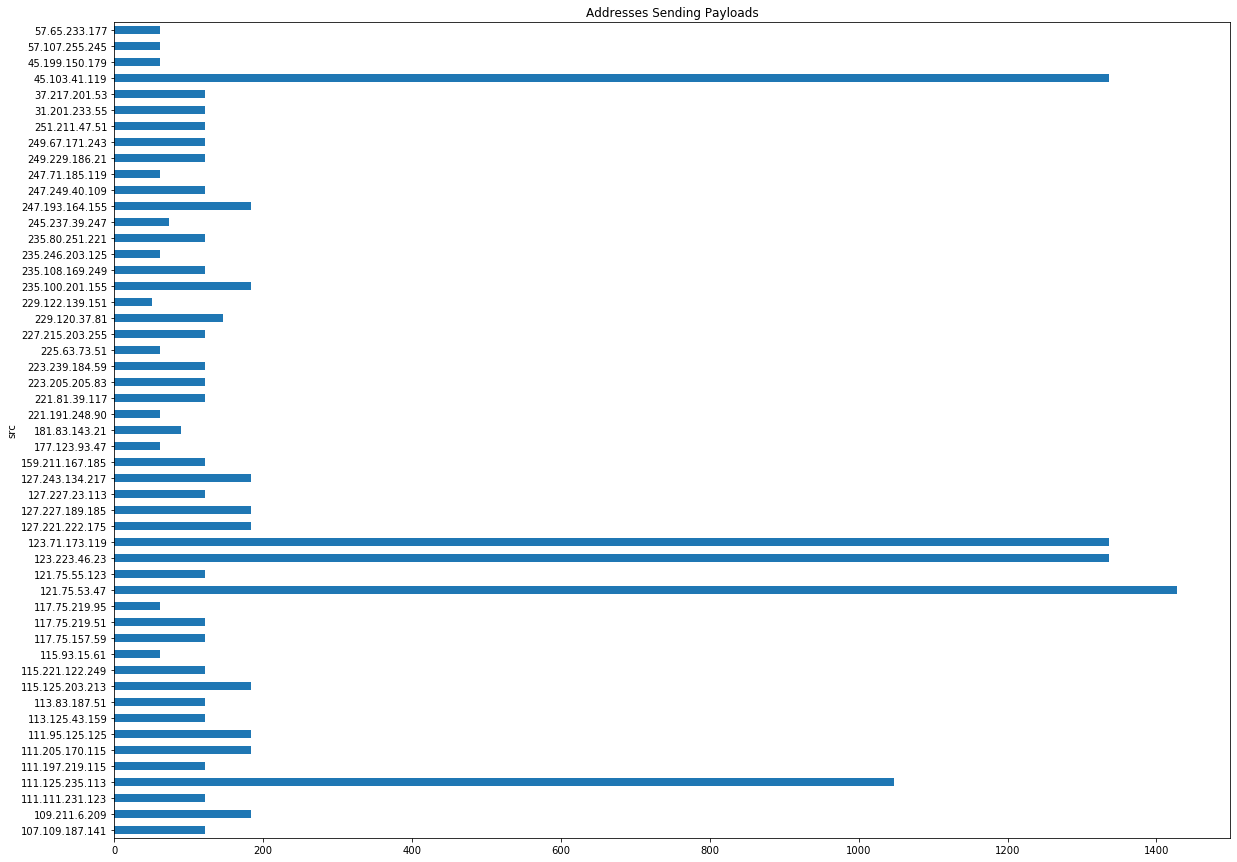

In [20]:
# Group by source address and payload pum
source_addresses = df.groupby("src")["payload"].sum()
source_addresses.plot(kind="barh", title="Addresses Sending Payloads", figsize=(20, 15))

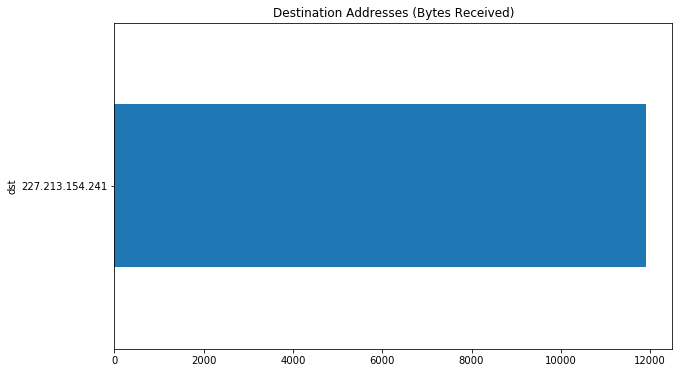

In [21]:
# Group by destination address and payload sum
destination_addresses = df.groupby("dst")["payload"].sum()
destination_addresses.plot(kind="barh", title="Destination Addresses (Bytes Received)", figsize=(10, 6))

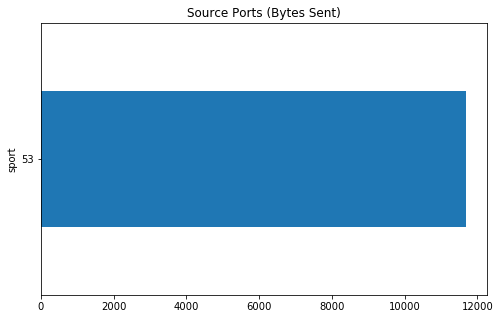

In [22]:
# Group by source port and payload sum
source_payloads = df.groupby("sport")["payload"].sum()
source_payloads.plot(kind="barh", title="Source Ports (Bytes Sent)", figsize=(8, 5))

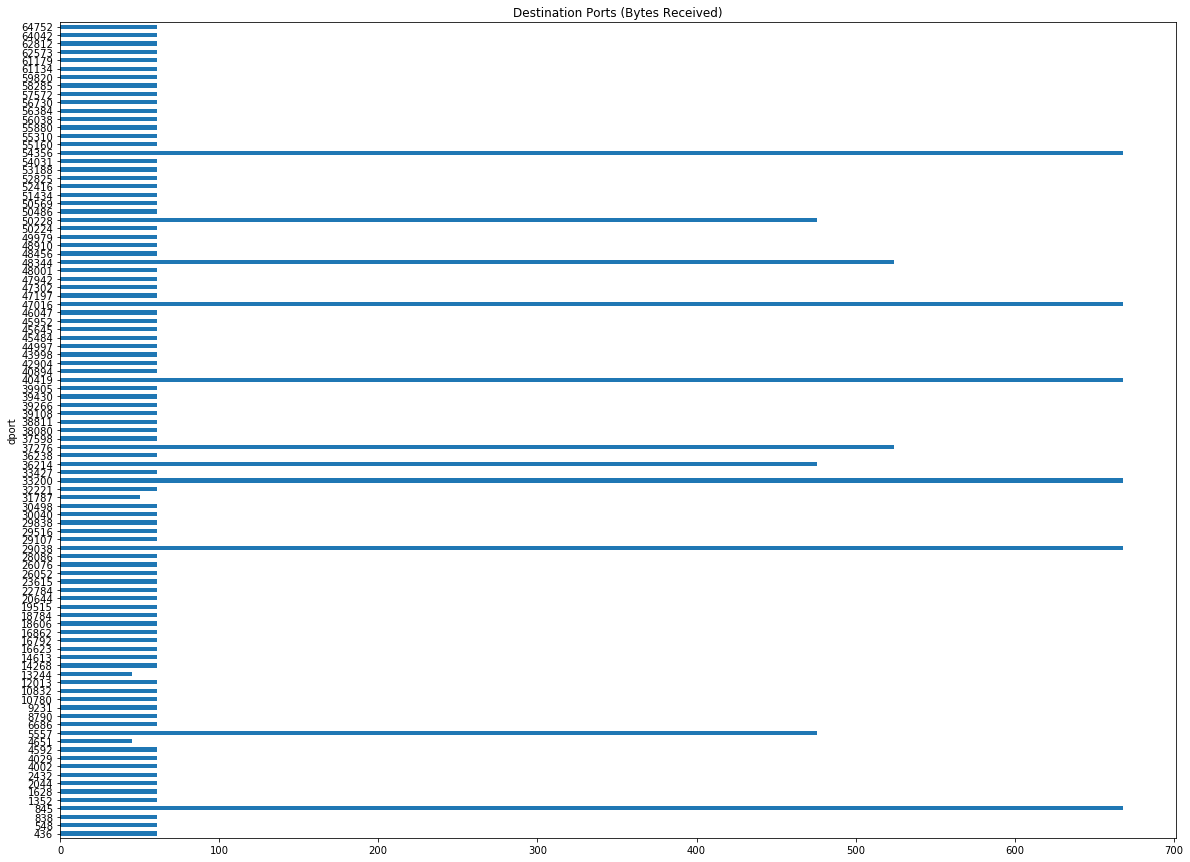

In [23]:
# Group by destination port and payload sum
destination_payloads = df.groupby("dport")["payload"].sum()
destination_payloads.plot(kind="barh", title="Destination Ports (Bytes Received)", figsize=(20, 15))

227.213.154.241 May be a suspicious address


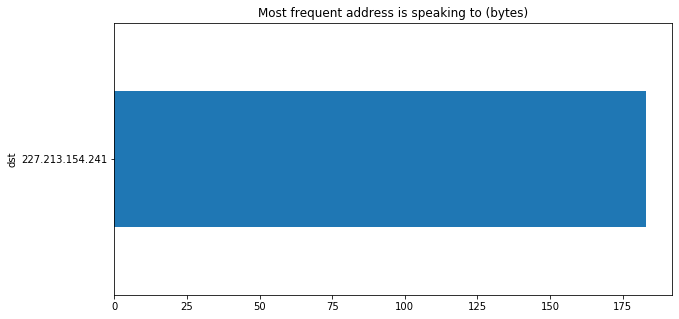

In [24]:
# Create dataframe with only converation from most frequent address
frequent_address_df = df[df["src"] == frequent_address]

# Only display Src Address, Dst Address, and group by Payload 
frequent_address_groupby = frequent_address_df[["src", "dst", "payload"]].groupby("dst")["payload"].sum()

# Plot the Frequent address is speaking to (By Payload)
frequent_address_groupby.plot(kind="barh", title="Most frequent address is speaking to (bytes)", figsize=(10,5))

# Which address has excahnged the most amount of bytes with most frequent address
suspicious_ip = frequent_address_groupby.sort_values(ascending=False).index[0]
print(suspicious_ip, "May be a suspicious address")

# Create dataframe with only conversation from most frequent address and suspicious address
suspicious_df = frequent_address_df[frequent_address_df["dst"] == suspicious_ip]

In [25]:
# Sniffing 
"""
num_of_packets_to_sniff = 100
pcap = sniff(count=num_of_packets_to_sniff)

# rdpcap returns packet list
## packetlist object can be enumerated 
print(type(pcap))
print(len(pcap))
print(pcap)
pcap[0]
"""

'\nnum_of_packets_to_sniff = 100\npcap = sniff(count=num_of_packets_to_sniff)\n\n# rdpcap returns packet list\n## packetlist object can be enumerated \nprint(type(pcap))\nprint(len(pcap))\nprint(pcap)\npcap[0]\n'

## Analyzing pcap with tshark

Few examples

~~~
$ tshark -r data/attacker.pcap -q -Tjson
$ tshark -r data/attacker.pcap -q -Tfields -e data.data -e frame.time
~~~